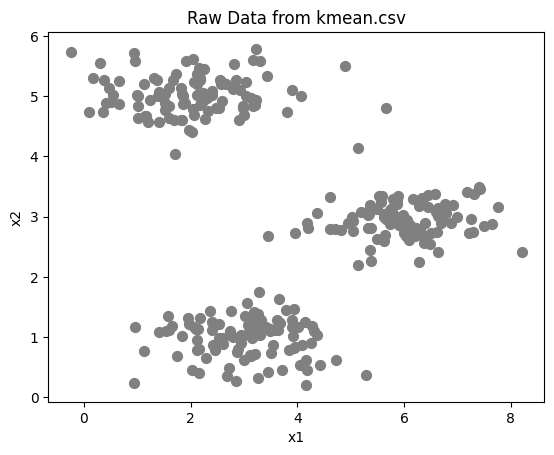

In [ ]:
# Cell 1: Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# Load the dataset
df = pd.read_csv('kmean.csv')

# Visualize the raw data to see what we are working with
plt.scatter(df['x1'], df['x2'], s=50, color='gray')
plt.title("Raw Data from kmean.csv")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

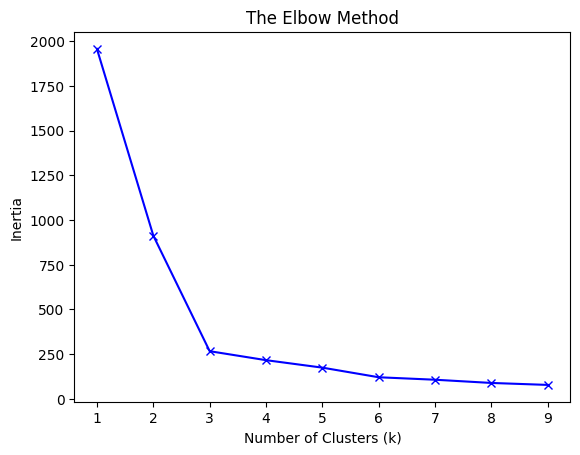

In [ ]:
# Cell 2: Find optimal K using the Elbow Method
inertias = []
K_range = range(1, 10)

for k in K_range:
    # We use only the values (ignoring column names)
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df.values)
    inertias.append(model.inertia_)

# Plot the Elbow Graph
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

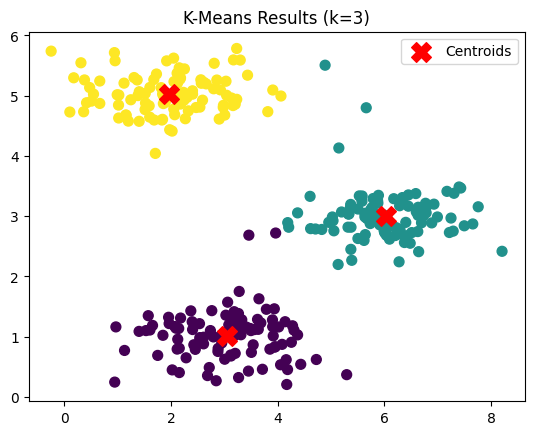

In [ ]:
# Cell 3: Apply K-Means with k=3
# (The elbow plot likely shows a bend at k=3 for this dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df.values)

# Plot the results
plt.scatter(df['x1'], df['x2'], c=y_kmeans, s=50, cmap='viridis')

# Plot the centers (centroids)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Results (k=3)")
plt.legend()
plt.show()

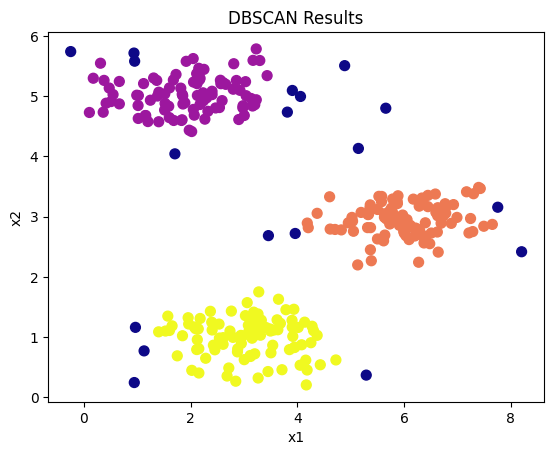

In [ ]:
# Cell 4: Apply DBSCAN
# eps=0.4 is chosen based on the density of your specific data
# min_samples=5 is a standard starting point
dbscan = DBSCAN(eps=0.4, min_samples=5)
y_dbscan = dbscan.fit_predict(df.values)

# Plot the results
plt.scatter(df['x1'], df['x2'], c=y_dbscan, s=50, cmap='plasma')
plt.title("DBSCAN Results")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()